In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Read the dataset into pandas dataframe
df = pd.read_csv("C:/Users/USER/Downloads/Dataset (1).csv")
df.head()

,DATE,country,NEW Cases,NEW_DEATHS,vaccinated
0,2024-11-01,Argentina,NaN,NaN,unknown
1,2024-11-01,Australia,0.0,0.0,327
2,2024-11-01,Australia,0.0,0.0,327
3,2024-11-01,Brazil,971.0,48.0,430
4,2024-11-01,Canada,176.0,8.0,unknown


In [3]:
# Examine the shape
df.shape

(165, 5)

In [4]:
#Drop duplicate rows
df1= df.drop_duplicates()
df1

,DATE,country,NEW Cases,NEW_DEATHS,vaccinated
0,2024-11-01,Argentina,NaN,NaN,unknown
1,2024-11-01,Australia,0.0,0.0,327
3,2024-11-01,Brazil,971.0,48.0,430
4,2024-11-01,Canada,176.0,8.0,unknown
5,2024-11-01,China,1034.0,51.0,462
...,...,...,...,...,...
158,2024-11-30,Argentina,1619.0,80.0,unknown
159,2024-11-30,Australia,1473.0,73.0,428
160,2024-11-30,Brazil,514.0,25.0,unknown
161,2024-11-30,Canada,1133.0,56.0,438


In [5]:
#Checking for missing values. NEW Cases column has 11 missing values while NEW_DEATHS column has 25
df1.isnull().sum()

DATE            0
country         0
 NEW Cases     11
NEW_DEATHS     25
vaccinated      0
dtype: int64

In [6]:
#check for info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 163
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         150 non-null    object 
 1   country      150 non-null    object 
 2    NEW Cases   139 non-null    float64
 3   NEW_DEATHS   125 non-null    float64
 4   vaccinated   150 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.0+ KB


In [7]:
# Formatting the columns header based on standard format
df2 = df1.set_axis(['Date', 'Country', 'New_Cases' , 'New_Deaths','Vaccinated'], axis=1)
df2

,Date,Country,New_Cases,New_Deaths,Vaccinated
0,2024-11-01,Argentina,NaN,NaN,unknown
1,2024-11-01,Australia,0.0,0.0,327
3,2024-11-01,Brazil,971.0,48.0,430
4,2024-11-01,Canada,176.0,8.0,unknown
5,2024-11-01,China,1034.0,51.0,462
...,...,...,...,...,...
158,2024-11-30,Argentina,1619.0,80.0,unknown
159,2024-11-30,Australia,1473.0,73.0,428
160,2024-11-30,Brazil,514.0,25.0,unknown
161,2024-11-30,Canada,1133.0,56.0,438


In [8]:
# Median value of New_Deaths column
df2.New_Deaths.median()

29.0

In [9]:
#Filling the missing value with the median
df2['New_Deaths'] = df2['New_Deaths'].fillna(df2.New_Deaths.median())
df2['New_Deaths'].isnull().sum()

0

In [10]:
#Filling the missing value in New_Cases column with the median
df2['New_Cases'] = df2['New_Cases'].fillna(df2.New_Cases.median())
df2

,Date,Country,New_Cases,New_Deaths,Vaccinated
0,2024-11-01,Argentina,591.0,29.0,unknown
1,2024-11-01,Australia,0.0,0.0,327
3,2024-11-01,Brazil,971.0,48.0,430
4,2024-11-01,Canada,176.0,8.0,unknown
5,2024-11-01,China,1034.0,51.0,462
...,...,...,...,...,...
158,2024-11-30,Argentina,1619.0,80.0,unknown
159,2024-11-30,Australia,1473.0,73.0,428
160,2024-11-30,Brazil,514.0,25.0,unknown
161,2024-11-30,Canada,1133.0,56.0,438


In [11]:
#Referencing the Vaccinated column. There are 16 unknown values in the Vaccinated column
df2[df2['Vaccinated']=='unknown']

,Date,Country,New_Cases,New_Deaths,Vaccinated
0,2024-11-01,Argentina,591.0,29.0,unknown
4,2024-11-01,Canada,176.0,8.0,unknown
21,2024-11-04,China,696.0,34.0,unknown
37,2024-11-08,Argentina,665.0,33.0,unknown
49,2024-11-10,Australia,405.0,20.0,unknown
73,11/14/2024,China,718.0,35.0,unknown
74,2024-11-15,Argentina,728.0,36.0,unknown
76,2024-11-15,Brazil,591.0,29.0,unknown
92,11/18/2024,Argentina,591.0,29.0,unknown
109,2024-11-20,China,116.0,29.0,unknown


In [12]:
# Extracting only the numeric value from the Vaccinated column
df2['Vaccinated'] = df2['Vaccinated'].str.extract('(\d+)', expand=False)
df2

,Date,Country,New_Cases,New_Deaths,Vaccinated
0,2024-11-01,Argentina,591.0,29.0,NaN
1,2024-11-01,Australia,0.0,0.0,327
3,2024-11-01,Brazil,971.0,48.0,430
4,2024-11-01,Canada,176.0,8.0,NaN
5,2024-11-01,China,1034.0,51.0,462
...,...,...,...,...,...
158,2024-11-30,Argentina,1619.0,80.0,NaN
159,2024-11-30,Australia,1473.0,73.0,428
160,2024-11-30,Brazil,514.0,25.0,NaN
161,2024-11-30,Canada,1133.0,56.0,438


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 163
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        150 non-null    object 
 1   Country     150 non-null    object 
 2   New_Cases   150 non-null    float64
 3   New_Deaths  150 non-null    float64
 4   Vaccinated  134 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.0+ KB


In [14]:
#Filling the missing value in Vaccinated column with the median
df2['Vaccinated'] = df2['Vaccinated'].fillna(df2.Vaccinated.median())
df2

,Date,Country,New_Cases,New_Deaths,Vaccinated
0,2024-11-01,Argentina,591.0,29.0,350.0
1,2024-11-01,Australia,0.0,0.0,327
3,2024-11-01,Brazil,971.0,48.0,430
4,2024-11-01,Canada,176.0,8.0,350.0
5,2024-11-01,China,1034.0,51.0,462
...,...,...,...,...,...
158,2024-11-30,Argentina,1619.0,80.0,350.0
159,2024-11-30,Australia,1473.0,73.0,428
160,2024-11-30,Brazil,514.0,25.0,350.0
161,2024-11-30,Canada,1133.0,56.0,438


In [15]:
#Rechecking for any missing value
df2.isnull().sum()

Date          0
Country       0
New_Cases     0
New_Deaths    0
Vaccinated    0
dtype: int64

In [16]:
# Changing the data type of Vaccinated column to float
df2['Vaccinated'] = df2['Vaccinated'].astype(float)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 163
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        150 non-null    object 
 1   Country     150 non-null    object 
 2   New_Cases   150 non-null    float64
 3   New_Deaths  150 non-null    float64
 4   Vaccinated  150 non-null    float64
dtypes: float64(3), object(2)
memory usage: 7.0+ KB


In [17]:
# Referencing the Date column. There is inconsistent formats.
df2['Date'][:40]

0     2024-11-01
1     2024-11-01
3     2024-11-01
4     2024-11-01
5     2024-11-01
6     2024-11-02
7     2024-11-02
8     2024-11-02
9     2024-11-02
10    2024-11-02
11    2024-11-03
12    2024-11-03
13    2024-11-03
14    2024-11-03
15    2024-11-03
16    2024-11-04
17    2024-11-04
18    2024-11-04
20    2024-11-04
21    2024-11-04
22    2024-11-05
23    2024-11-05
24    2024-11-05
25    11/05/2024
26    2024-11-05
27    2024-11-06
28    2024-11-06
29    2024-11-06
30    2024-11-06
31    2024-11-06
32    2024-11-07
33    2024-11-07
34    2024-11-07
35    11/07/2024
36    2024-11-07
37    2024-11-08
38    2024-11-08
40    2024-11-08
41    2024-11-08
42    2024-11-08
Name: Date, dtype: object

In [18]:
# Convert to datetime and format
df2['Date'] = pd.to_datetime(df2['Date'], format='mixed').dt.strftime('%Y-%m-%d')
df2

,Date,Country,New_Cases,New_Deaths,Vaccinated
0,2024-11-01,Argentina,591.0,29.0,350.0
1,2024-11-01,Australia,0.0,0.0,327.0
3,2024-11-01,Brazil,971.0,48.0,430.0
4,2024-11-01,Canada,176.0,8.0,350.0
5,2024-11-01,China,1034.0,51.0,462.0
...,...,...,...,...,...
158,2024-11-30,Argentina,1619.0,80.0,350.0
159,2024-11-30,Australia,1473.0,73.0,428.0
160,2024-11-30,Brazil,514.0,25.0,350.0
161,2024-11-30,Canada,1133.0,56.0,438.0


In [19]:
# Summary Statistics of the numeric columns
df2.select_dtypes('number').describe()

,New_Cases,New_Deaths,Vaccinated
count,150.000000,150.00000,150.000000
mean,586.800000,28.96000,312.600000
std,393.979048,18.97327,141.809968
min,0.000000,0.00000,2.000000
25%,314.750000,17.00000,191.250000
50%,591.000000,29.00000,350.000000
75%,791.000000,37.00000,424.250000
max,1730.000000,86.00000,499.000000


In [20]:
# Daily trends in infections and fatalities
df3 = df2.groupby(['Date','Country'])[['New_Cases', 'New_Deaths']].apply(pd.DataFrame)
df3

New_Cases  New_Deaths
Date       Country                             
2024-11-01 Argentina 0        591.0        29.0
           Australia 1          0.0         0.0
           Brazil    3        971.0        48.0
           Canada    4        176.0         8.0
           China     5       1034.0        51.0
...                             ...         ...
2024-11-30 Argentina 158     1619.0        80.0
           Australia 159     1473.0        73.0
           Brazil    160      514.0        25.0
           Canada    161     1133.0        56.0
           China     163        0.0         0.0

[150 rows x 2 columns]

In [21]:
#Determining relationship between infections and fatalities on a daily basis. There is strong 
#positive correlation between infections and fatalities
df3.corr()

,New_Cases,New_Deaths
New_Cases,1.000000,0.965361
New_Deaths,0.965361,1.000000


<Axes: >

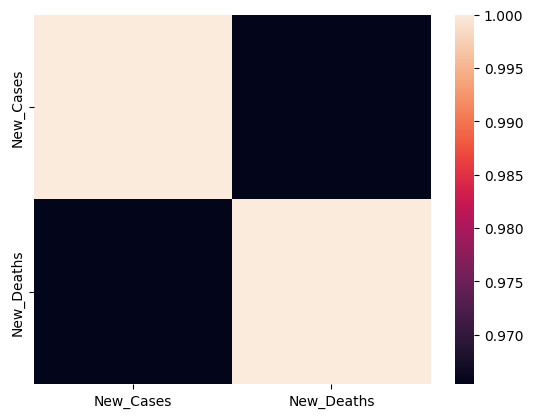

In [22]:
#Visualizing the relationship in a heatmap
sns.heatmap(df3.corr())

In [23]:
# Cumulative trends in infections and fatalities
df4 = df3.groupby('Country')[['New_Cases', 'New_Deaths']].sum()
df4

,New_Cases,New_Deaths
Country,,
Argentina,22604.0,1106.0
Australia,22123.0,1065.0
Brazil,13907.0,695.0
Canada,15059.0,750.0
China,14327.0,728.0


In [24]:
#Determining relationship between infections and fatalities on a cumulative basis. There is stronger 
#positive correlation between infection and fatalities
df4.corr()

,New_Cases,New_Deaths
New_Cases,1.000000,0.999083
New_Deaths,0.999083,1.000000


<Axes: >

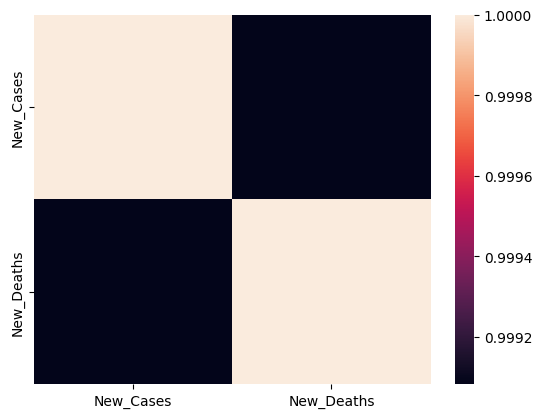

In [25]:
#Visualizing the relationship in a heatmap
sns.heatmap(df4.corr())

In [26]:
#Comparing case and death rates across different countries and regions
df4['New_Cases_Rates']=(df4['New_Cases']/df4['New_Cases'].sum())*100
df4['New_Deaths_Rates']= (df4['New_Deaths']/df4['New_Deaths'].sum())*100
df4

,New_Cases,New_Deaths,New_Cases_Rates,New_Deaths_Rates
Country,,,,
Argentina,22604.0,1106.0,25.680527,25.460405
Australia,22123.0,1065.0,25.134060,24.516575
Brazil,13907.0,695.0,15.799818,15.999079
Canada,15059.0,750.0,17.108612,17.265193
China,14327.0,728.0,16.276983,16.758748


In [27]:
# A dataframe of cases, deaths and vaccinations over time
df5 = df2.drop('Country',axis=1).groupby('Date').sum()
df5



,New_Cases,New_Deaths,Vaccinated
Date,,,
2024-11-01,2772.0,136.0,1919.0
2024-11-02,1199.0,87.0,1134.0
2024-11-03,2389.0,114.0,1635.0
2024-11-04,2469.0,121.0,1803.0
2024-11-05,2700.0,148.0,1681.0
2024-11-06,1373.0,88.0,1625.0
2024-11-07,1979.0,98.0,1099.0
2024-11-08,2038.0,119.0,1909.0
2024-11-09,2735.0,134.0,1317.0


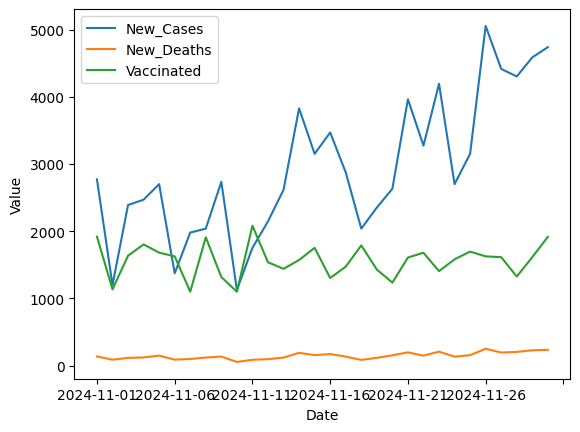

In [28]:
# Plotting line plots for the three columns
df5.plot(kind='line')
plt.ylabel('Value')
plt.show()

In [29]:
# Let's plot each of New_Cases, New_Deaths and Vaccinated columns individually over time.
#Dropping New_Deaths and Vaccinated columns
df6 = df5.drop(['New_Deaths', 'Vaccinated'], axis=1)
df6

,New_Cases
Date,
2024-11-01,2772.0
2024-11-02,1199.0
2024-11-03,2389.0
2024-11-04,2469.0
2024-11-05,2700.0
2024-11-06,1373.0
2024-11-07,1979.0
2024-11-08,2038.0
2024-11-09,2735.0


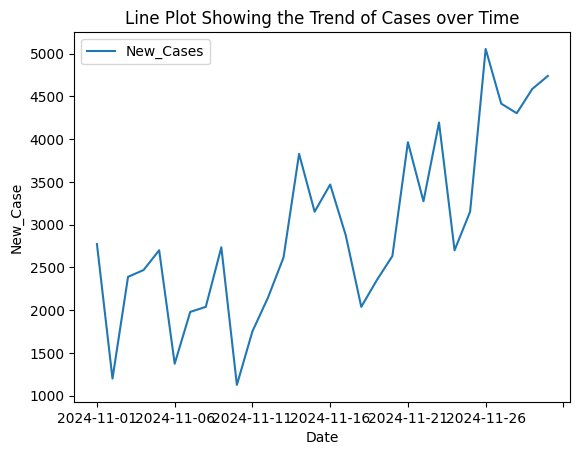

In [41]:
# Plotting New_Case
df6.plot(kind='line')
plt.ylabel('New_Case')
plt.title('Line Plot Showing the Trend of Cases over Time')
plt.show()

In [31]:
# Dropping New_Cases and Vaccinated columns
df7 = df5.drop(['New_Cases', 'Vaccinated'], axis=1)
df7

,New_Deaths
Date,
2024-11-01,136.0
2024-11-02,87.0
2024-11-03,114.0
2024-11-04,121.0
2024-11-05,148.0
2024-11-06,88.0
2024-11-07,98.0
2024-11-08,119.0
2024-11-09,134.0


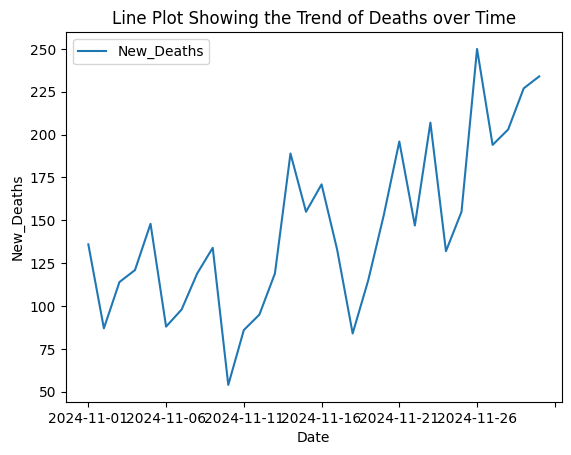

In [40]:
#Plotting New_Deaths
# It can be seen that New_Cases and New_Deaths followed similar trends 
#since there is a strong correlation between them
df7.plot(kind='line')
plt.ylabel('New_Deaths')
plt.title('Line Plot Showing the Trend of Deaths over Time')
plt.show()

In [33]:
#Dropping New_Cases and New_Deaths columns
df8 = df5.drop(['New_Cases', 'New_Deaths'], axis=1)
df8

,Vaccinated
Date,
2024-11-01,1919.0
2024-11-02,1134.0
2024-11-03,1635.0
2024-11-04,1803.0
2024-11-05,1681.0
2024-11-06,1625.0
2024-11-07,1099.0
2024-11-08,1909.0
2024-11-09,1317.0


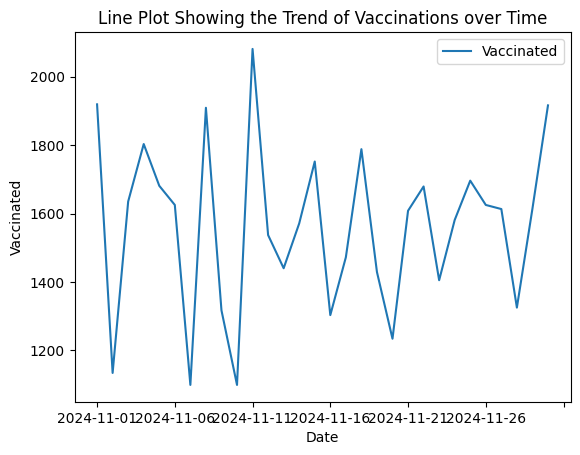

In [42]:
#Plotting Vaccinated column
df8.plot(kind='line')
plt.ylabel('Vaccinated')
plt.title('Line Plot Showing the Trend of Vaccinations over Time')
plt.show()

In [35]:
# A dataframe to visualize
df9 = df2.drop('Date',axis=1).groupby('Country').sum()
df9

,New_Cases,New_Deaths,Vaccinated
Country,,,
Argentina,22604.0,1106.0,7888.0
Australia,22123.0,1065.0,12298.0
Brazil,13907.0,695.0,6359.0
Canada,15059.0,750.0,12112.0
China,14327.0,728.0,8233.0


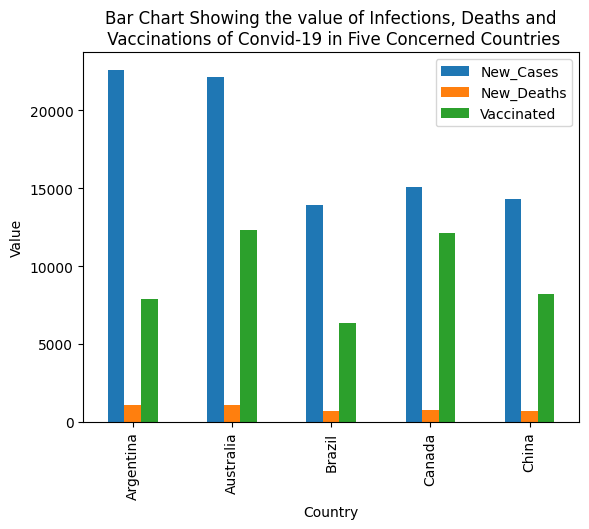

In [36]:
# Plotting a Bar Chart
df9.plot(kind ='bar')
plt.ylabel('Value')
plt.title('Bar Chart Showing the value of Infections, Deaths and\n Vaccinations of Convid-19 in Five Concerned Countries')
plt.show()

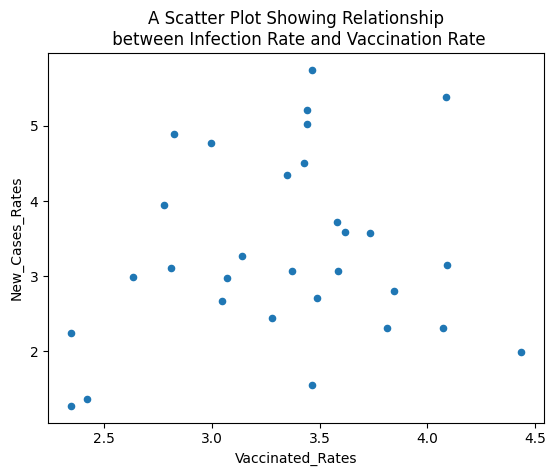

In [49]:
# Relationship between infection rates and testing or vaccination rates
df10 = df5.drop('New_Deaths',axis=1)
df10['New_Cases_Rates'] = (df10['New_Cases']/df10['New_Cases'].sum())*100
df10['Vaccinated_Rates'] = (df10['Vaccinated']/df10['Vaccinated'].sum())*100
# Visualizing the dataframe through a scatter plot to explore relationship
df10.drop(columns=['New_Cases','Vaccinated'],axis=1).plot(x='Vaccinated_Rates',y='New_Cases_Rates',kind='scatter')
plt.title('A Scatter Plot Showing Relationship\n between Infection Rate and Vaccination Rate')
plt.show()
